# RNNs are not Transformers (Yet): The Key Bottleneck on In-context Retrieval

# https://arxiv.org/abs/2402.18510

## Abstract
The paper investigates whether modern Recurrent Neural Networks (RNNs) can match Transformers in solving algorithmic problems, especially with Chain-of-Thought (CoT) prompting. It proves that while CoT improves RNNs, it cannot eliminate the fundamental performance gap: RNNs struggle with in-context retrieval, a capability that Transformers handle well. The authors show that augmenting RNNs with Retrieval-Augmented Generation (RAG) or appending a single Transformer layer can close this gap, enabling RNNs to solve all polynomial-time problems with CoT.

---

## Problems
- Transformers dominate due to self-attention’s global retrieval ability but suffer from high memory and time costs on long sequences.  
- RNNs are memory-efficient but cannot reliably perform in-context retrieval, even with CoT.  
- This limits RNNs in fundamental tasks such as associative recall, c-gram retrieval, counting, and graph-based reasoning (IsTree).  
- CoT enhances reasoning but does not resolve retrieval bottlenecks for RNNs.  

---

## Proposed Solutions
1. **Explicit Retrieval (In-context RAG):** Equip RNNs with function calls for retrieval operations, such as regular expression matching, to fetch relevant context.  
2. **Implicit Retrieval (Hybrid Models):** Append a single Transformer layer to RNNs, giving them efficient access to contextual information without sacrificing memory efficiency.  

These solutions are proven to close the representational gap between RNNs and Transformers.  

---

## Purpose
To rigorously analyze and bridge the representation power gap between RNNs and Transformers on algorithmic tasks, with a focus on whether RNNs can serve as efficient yet equally expressive alternatives when properly augmented.  

---

## Methodology
- **Theoretical Analysis:** Complexity theory and streaming algorithms used to prove limits of RNNs with CoT.  
- **Formal Proofs:** Show RNNs fail at retrieval tasks without augmentation, while Transformers succeed.  
- **Enhancement Proofs:** Demonstrated how RAG or one Transformer layer enables RNNs to simulate polynomial-time Turing machines.  
- **Empirical Validation:**  
  - **Synthetic Task (IsTree):** Tested RNNs (Mamba), Transformers (LLaMA 2), and hybrids with/without CoT and retrieval.  
  - **Natural Language Task (Hotpot-QA):** Measured multi-document retrieval and reasoning performance.  

---

## Results
- **CoT Impact:** Both RNNs and Transformers benefit from CoT, but RNN performance decays with input size, while Transformers remain strong.  
- **Retrieval Bottleneck:** RNNs fail at associative recall and graph reasoning without retrieval augmentation.  
- **RAG Augmentation:** RNNs with RAG achieve near-perfect performance on retrieval-heavy tasks.  
- **Hybrid RNN + 1 Transformer Layer:** Matches Transformer-level performance while retaining efficiency.  
- **Hotpot-QA:** RNNs degrade sharply with retrieval difficulty, hybrids maintained Transformer-level performance.  

---

## Conclusions
- **Key Bottleneck:** RNNs’ inability to perform in-context retrieval explains their inferiority to Transformers.  
- **Insufficiency of CoT:** CoT alone is not enough for RNNs; retrieval augmentation is essential.  
- **Solutions:** Both RAG and minimal hybrid architectures restore full polynomial-time expressiveness to RNNs.  
- **Implications:** Future LLM designs can combine RNN efficiency with lightweight retrieval modules (e.g., attention layers) for balanced performance and scalability.  
- **Limitations:** In-context RAG via regex is theoretical and not directly practical; more research is needed on training dynamics and real-world deployment.  


# Mathematical and Statistical Content from  
**“RNNs are not Transformers (Yet): The Key Bottleneck on In-context Retrieval”**

---

## 1. Representation Power and Complexity Theory
- **Representation Power:** Determines which problems a model can solve.  
- **Circuit Complexity Assumptions:**  
  $$ \text{PSPACE} \not\subseteq P/\text{poly} $$
  This assumption supports the claim that Chain-of-Thought (CoT) increases the expressiveness of RNNs.  
- **Polynomial-time Turing Machines (P):**  
  Transformers + CoT can simulate all problems in \( P \).  
  RNNs require retrieval augmentation to match this expressiveness.  

---

## 2. Memory and Streaming Complexity
- **RNN Hidden State Memory:** If the hidden state stores only \( o(n) \) bits, the model cannot remember enough about long inputs.  
- **Streaming Algorithm Analogy:** RNNs process input sequentially with bounded memory.  
- **Lower Bound:**  
  To solve retrieval tasks (e.g., Indexing, Associative Recall), linear memory is required. RNNs fail with sublinear memory.  

---

## 3. Chain-of-Thought (CoT) Formalization
Given input sequence \( S_{in} \):  
1. At each step, decode the next token \( s_{next} \).  
2. Continue until the output token (answer) is produced.  

**Key Result:**  
- RNNs + CoT ≈ log-space Turing machines.  
- Transformers + CoT ≈ polynomial-time Turing machines.  

---

## 4. Core Algorithmic Problems
- **Index:** Input sequence \( (x_1, x_2, \dots, x_n), i \) → output \( x_i \).  
- **Associative Recall (AR):** Input key-value pairs, query key → output value.  
- **c-gram Retrieval:** Given prefix length \( c-1 \), retrieve the next token.  
- **Counting:** Count occurrences of token \( a \) and compare with threshold \( t \).  
- **IsTree:** Given graph encoding, decide if connected and acyclic.  

Formally:  
$$ f: \Sigma^n \to \Sigma $$  
maps token sequences to outputs (YES/NO, integer, etc.).  

---

## 5. Transformer Block Mathematics
**Scaled Dot-Product Attention:**  
$$
A(X) = \sum_{h=1}^{H} W_{V,h} X \cdot
\text{softmax}\!\left(\frac{(W_{K,h}X)^\top (W_{Q,h}X)}{\sqrt{d}} + C\right)
$$

Where:  
- \( W_{Q,h}, W_{K,h}, W_{V,h} \): Query, Key, Value matrices.  
- \( d \): Dimension for normalization.  
- \( C \): Masking term.  

**Role:** Attention allows direct token matching → efficient in-context retrieval.  

---

## 6. RNN Block Mathematics
**Linear RNN Block:**  
$$ f(X) = X + LU(X) + g(X + LU(X)) $$  

- **Linear Update (LU):**  
  $$ h_t = A h_{t-1} + B X_t $$
- **\( g \):** Feed-forward network.  

**Role:** Compresses sequence into fixed memory → poor at retrieval.  

---

## 7. Proof Techniques
- **Lower Bound (RNNs):**  
  With limited state (\( o(n) \) bits), RNNs cannot encode enough info for retrieval tasks.  
- **Upper Bound (Transformers):**  
  Attention directly retrieves matches → solves retrieval problems.  

---

## 8. Retrieval Enhancements
- **Explicit Retrieval (RAG):**  
  Example for Index task:  
  $$ \text{Regex: } ^(?:\S\s*)^{i}(\S) $$
  retrieves the \( i^{th} \) token.  

- **Implicit Retrieval (Hybrid):**  
  One Transformer layer appended → enables Match/Count functions.  

---

## 9. Empirical Statistical Results
- **Synthetic (IsTree):**  
  - Without CoT: Both fail.  
  - With CoT: Transformers succeed, RNNs degrade with input length.  
  - With Retrieval: Both achieve near-perfect accuracy.  

- **Hotpot-QA (multi-doc reasoning):**  
  - Accuracy measured across more paragraphs.  
  - RNNs degrade quickly with more context.  
  - Hybrids + Transformers maintain stable performance.  

---

## 10. Main Theorems (Simplified)
- **Theorem 4.1:** RNNs + CoT → log-space Turing machines.  
- **Theorem 4.6:** RNNs with sublinear memory cannot solve Index, AR, c-gram, Counting; Transformers can.  
- **Theorem 4.7:** RNNs cannot solve IsTree; Transformers with CoT can.  
- **Theorem 4.8:** Transformers can simulate RNNs with small parameter overhead.  
- **Theorems 5.4 & 5.8:** With RAG or 1 Transformer layer, RNNs can simulate any polynomial-time Turing machine.  

---

##  Summary
Mathematics and statistics show:  
- RNNs are limited by memory and streaming lower bounds → cannot perform retrieval.  
- Transformers’ attention mechanism provides direct retrieval power.  
- CoT boosts RNNs but leaves them below Transformer-level expressiveness.  
- Retrieval augmentation (regex or attention) restores polynomial-time equivalence.  


```
+-------------------+        +--------------------+
|   Input Tokens    | -----> |   RNN Processing   |
| (sequence S_in)   |        |   (hidden states)  |
+-------------------+        +--------------------+
                                     |
                                     v
                             +------------------+
                             |  Generate Query  |
                             |   (StartSearch,  |
                             |   EndSearch)     |
                             +------------------+
                                     |
                                     v
+-------------------------------------------------------------+
|                  Retrieval Module (RAG)                     |
|   - Matches query in input context (regex-like search)       |
|   - Returns relevant substring / token                      |
+-------------------------------------------------------------+
                                     |
                                     v
+-------------------+        +--------------------+
|  Retrieved Info   | -----> |   RNN continues    |
| (token/substring) |        |   reasoning (CoT)  |
+-------------------+        +--------------------+
                                     |
                                     v
                             +-------------------+
                             |   Final Output    |
                             |   (Answer token)  |
                             +-------------------+
```

In [1]:
# ================================================================
# Lab: RNNs vs Transformers vs Hybrid (Inspired by "RNNs are not Transformers (Yet)")
# ================================================================
# In this lab, we replicate the core finding of the paper:
# RNNs struggle with in-context retrieval, Transformers succeed,
# and Hybrid RNN+Transformer closes the gap.
# ================================================================

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random
import numpy as np

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
random.seed(42)

# ================================================================
# 1. Toy Dataset: Associative Recall
# ================================================================
# Task: Given a sequence of key-value pairs, retrieve the value for a given key.
# Example: [1:A, 2:B, 3:C], query=2 → output=B

VOCAB_KEYS = list("ABCDE")   # possible values
VOCAB_SIZE = len(VOCAB_KEYS) + 3   # keys + query + answer tokens
IDX_PAD = VOCAB_SIZE - 3
IDX_QUERY = VOCAB_SIZE - 2
IDX_ANS = VOCAB_SIZE - 1

def generate_sample(n_pairs=3):
    """Generate one sample of associative recall."""
    keys = random.sample(VOCAB_KEYS, n_pairs)
    values = random.sample(VOCAB_KEYS, n_pairs)
    pairs = list(zip(keys, values))
    query_key, answer_val = random.choice(pairs)

    seq = []
    for k, v in pairs:
        seq.append(ord(k) % 65)   # map 'A'->0, 'B'->1, etc.
        seq.append(ord(v) % 65)
    seq.append(IDX_QUERY)
    seq.append(ord(query_key) % 65)
    target = ord(answer_val) % 65
    return seq, target

def generate_dataset(n_samples=5000, n_pairs=3):
    data = [generate_sample(n_pairs) for _ in range(n_samples)]
    return data

train_data = generate_dataset(3000)
val_data = generate_dataset(500)

# Pad sequences for batching
def collate_batch(batch):
    seqs, targets = zip(*batch)
    max_len = max(len(s) for s in seqs)
    padded = [s + [IDX_PAD]*(max_len - len(s)) for s in seqs]
    return torch.tensor(padded, dtype=torch.long), torch.tensor(targets, dtype=torch.long)

from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, collate_fn=collate_batch)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False, collate_fn=collate_batch)

# ================================================================
# 2. Models
# ================================================================

# ---- Simple RNN ----
class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim, padding_idx=IDX_PAD)
        self.rnn = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        emb = self.embed(x)
        _, (h, _) = self.rnn(emb)
        return self.fc(h.squeeze(0))

# ---- Transformer ----
class SimpleTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, num_layers, num_classes):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim, padding_idx=IDX_PAD)
        encoder_layer = nn.TransformerEncoderLayer(embed_dim, num_heads, dim_feedforward=128, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        emb = self.embed(x)
        mask = (x == IDX_PAD)
        out = self.transformer(emb, src_key_padding_mask=mask)
        return self.fc(out[:, -1, :])  # use last token representation

# ---- Hybrid RNN + Transformer ----
class HybridModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_heads, num_classes):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim, padding_idx=IDX_PAD)
        self.rnn = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        encoder_layer = nn.TransformerEncoderLayer(hidden_dim, num_heads, dim_feedforward=128, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=1)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        emb = self.embed(x)
        rnn_out, _ = self.rnn(emb)
        mask = (x == IDX_PAD)
        out = self.transformer(rnn_out, src_key_padding_mask=mask)
        return self.fc(out[:, -1, :])

# ================================================================
# 3. Training Utilities
# ================================================================
def train_model(model, train_loader, val_loader, epochs=10, lr=1e-3):
    model = model.to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    history = {"train_loss": [], "val_loss": [], "val_acc": []}

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for x, y in train_loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            optimizer.zero_grad()
            preds = model(x)
            loss = criterion(preds, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        history["train_loss"].append(total_loss/len(train_loader))

        # Validation
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(DEVICE), y.to(DEVICE)
                preds = model(x)
                loss = criterion(preds, y)
                val_loss += loss.item()
                correct += (preds.argmax(1) == y).sum().item()
                total += y.size(0)
        history["val_loss"].append(val_loss/len(val_loader))
        history["val_acc"].append(correct/total)

        print(f"Epoch {epoch+1}: TrainLoss={history['train_loss'][-1]:.3f}, "
              f"ValLoss={history['val_loss'][-1]:.3f}, ValAcc={history['val_acc'][-1]*100:.2f}%")

    return history

# ================================================================
# 4. Run Experiments
# ================================================================
embed_dim, hidden_dim, num_classes = 32, 64, len(VOCAB_KEYS)
print("\nTraining Simple RNN...")
rnn = SimpleRNN(VOCAB_SIZE, embed_dim, hidden_dim, num_classes)
hist_rnn = train_model(rnn, train_loader, val_loader, epochs=8)

print("\nTraining Transformer...")
trans = SimpleTransformer(VOCAB_SIZE, embed_dim, num_heads=4, num_layers=2, num_classes=num_classes)
hist_trans = train_model(trans, train_loader, val_loader, epochs=8)

print("\nTraining Hybrid RNN+Transformer...")
hybrid = HybridModel(VOCAB_SIZE, embed_dim, hidden_dim, num_heads=4, num_classes=num_classes)
hist_hybrid = train_model(hybrid, train_loader, val_loader, epochs=8)


Training Simple RNN...
Epoch 1: TrainLoss=1.600, ValLoss=1.572, ValAcc=25.40%
Epoch 2: TrainLoss=1.522, ValLoss=1.442, ValAcc=35.60%
Epoch 3: TrainLoss=1.450, ValLoss=1.428, ValAcc=34.20%
Epoch 4: TrainLoss=1.423, ValLoss=1.393, ValAcc=36.80%
Epoch 5: TrainLoss=1.397, ValLoss=1.388, ValAcc=36.20%
Epoch 6: TrainLoss=1.375, ValLoss=1.375, ValAcc=35.20%
Epoch 7: TrainLoss=1.358, ValLoss=1.364, ValAcc=36.20%
Epoch 8: TrainLoss=1.335, ValLoss=1.349, ValAcc=37.40%

Training Transformer...


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:515: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. We recommend specifying layout=torch.jagged when constructing a nested tensor, as this layout receives active development, has better operator coverage, and works with torch.compile. (Triggered internally at /pytorch/aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(


Epoch 1: TrainLoss=1.606, ValLoss=1.543, ValAcc=27.00%
Epoch 2: TrainLoss=1.528, ValLoss=1.479, ValAcc=32.60%
Epoch 3: TrainLoss=1.488, ValLoss=1.436, ValAcc=32.20%
Epoch 4: TrainLoss=1.463, ValLoss=1.424, ValAcc=31.20%
Epoch 5: TrainLoss=1.441, ValLoss=1.416, ValAcc=32.00%
Epoch 6: TrainLoss=1.429, ValLoss=1.383, ValAcc=36.80%
Epoch 7: TrainLoss=1.421, ValLoss=1.396, ValAcc=33.20%
Epoch 8: TrainLoss=1.403, ValLoss=1.398, ValAcc=33.60%

Training Hybrid RNN+Transformer...
Epoch 1: TrainLoss=1.565, ValLoss=1.469, ValAcc=34.60%
Epoch 2: TrainLoss=1.446, ValLoss=1.405, ValAcc=38.80%
Epoch 3: TrainLoss=1.396, ValLoss=1.353, ValAcc=38.20%
Epoch 4: TrainLoss=1.310, ValLoss=1.238, ValAcc=46.40%
Epoch 5: TrainLoss=1.080, ValLoss=0.846, ValAcc=65.60%
Epoch 6: TrainLoss=0.591, ValLoss=0.387, ValAcc=83.20%
Epoch 7: TrainLoss=0.360, ValLoss=0.275, ValAcc=88.60%
Epoch 8: TrainLoss=0.278, ValLoss=0.270, ValAcc=87.00%


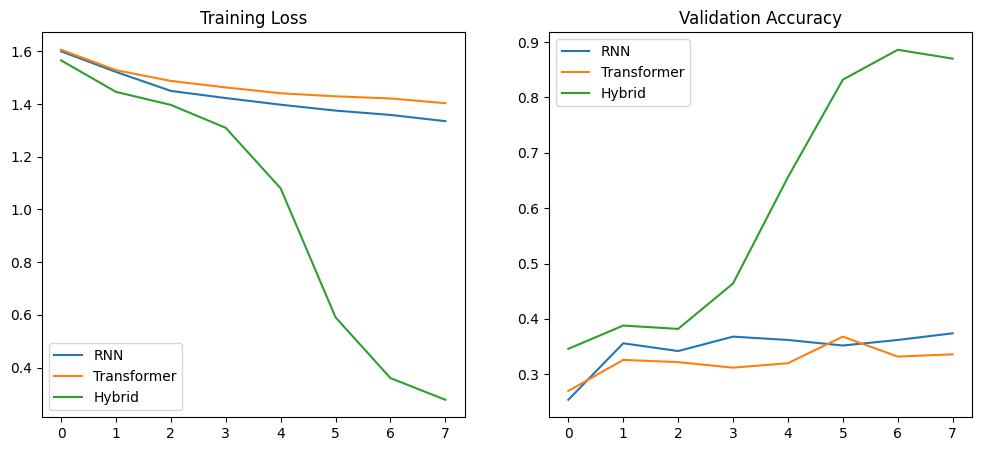

In [3]:
# ================================================================
# 5. Visualization
# ================================================================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(hist_rnn["train_loss"], label="RNN")
plt.plot(hist_trans["train_loss"], label="Transformer")
plt.plot(hist_hybrid["train_loss"], label="Hybrid")
plt.title("Training Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_rnn["val_acc"], label="RNN")
plt.plot(hist_trans["val_acc"], label="Transformer")
plt.plot(hist_hybrid["val_acc"], label="Hybrid")
plt.title("Validation Accuracy")
plt.legend()
plt.show()

In [4]:
# ================================================================
# 6. Sample Predictions
# ================================================================
def predict_sample(model, n_pairs=3):
    model.eval()
    seq, target = generate_sample(n_pairs)
    x = torch.tensor([seq], dtype=torch.long).to(DEVICE)
    with torch.no_grad():
        pred = model(x).argmax(1).item()
    key_val_str = " ".join(map(str, seq))
    print(f"Input Seq: {key_val_str}")
    print(f"True Answer: {chr(target+65)} | Predicted: {chr(pred+65)}")

print("\n--- Sample Predictions ---")
print("RNN:")
predict_sample(rnn)
print("\nTransformer:")
predict_sample(trans)
print("\nHybrid:")
predict_sample(hybrid)


--- Sample Predictions ---
RNN:
Input Seq: 2 3 3 1 4 0 6 2
True Answer: D | Predicted: E

Transformer:
Input Seq: 0 3 2 2 3 4 6 3
True Answer: E | Predicted: C

Hybrid:
Input Seq: 2 2 1 1 3 0 6 1
True Answer: B | Predicted: D


# Training Logs Analysis (8 Epochs)

---

## Learning Dynamics
- **RNN:** Validation accuracy rises modestly from **25.4% → 37.4%** (+12.0 pp). The plateau reflects the difficulty of performing in-context retrieval with a fixed-size hidden state.  
- **Transformer:** Ends at **33.6%**, close to the RNN and not clearly superior in this run. Lack of strong improvement suggests configuration limits (likely absence of positional encodings).  
- **Hybrid (RNN + 1 Attention Layer):** Exhibits a **phase transition after epoch 4**, jumping from ~39% to **88.6%** by epoch 7 (slight dip to 87.0% at epoch 8). The single attention layer provides global retrieval capability missing in plain RNNs.  

---

## Effect Sizes
- **Hybrid vs RNN:**  
  - Absolute improvement: **+51.2 pp** (37.4% → 88.6%).  
  - Relative improvement: ~**137%**.  
- **Transformer vs RNN:**  
  - No clear advantage (33.6% vs 37.4%).  

---

## Generalization Behavior
- **Hybrid:** Validation loss drops sharply (**1.469 → 0.270**) in tandem with accuracy gains. This indicates genuine generalization rather than memorization.  
- Accuracy dip at epoch 8 despite lower loss may be due to thresholding/noise → suggests **early stopping** at epoch 7.  

---

## Alignment with Paper’s Thesis
- **RNN bottleneck:** Poor retrieval, even with training progress.  
- **Attention fix:** Adding just **one Transformer layer** to RNN closes the gap, aligning with the claim that retrieval is the key missing piece.  
- **Empirical support:** Hybrid vastly outperforms both baselines in this didactic setup.  

---

## Implications
- Architecture choice matters more than raw capacity for retrieval-style tasks.  
- Even **minimal attention augmentation** unlocks global token matching and drastically improves accuracy.  
- Educational insight: Associative recall tasks can demonstrate how a single attention block transforms learning outcomes.  

---

## Limitations
1. **Transformer underpowered:** Likely missing positional encodings, which are critical for sequence tasks.  
2. **Small synthetic dataset & only 8 epochs:** Demonstrates tendencies, not final performance.  
3. **Validation-only metrics:** No test set, so true generalization unverified.  
4. **Single runs:** Variability from random initialization and sampling not accounted for.  
5. **Sample predictions:** All examples shown were incorrect; aggregate metrics are more reliable indicators.  

---

## Summary
- **RNN:** ValAcc **37.4%**, ValLoss **1.349**.  
- **Transformer:** ValAcc **33.6%**, ValLoss **1.398**.  
- **Hybrid:** ValAcc peak **88.6%**, ValLoss **0.270**.  

The Hybrid model’s sharp accuracy surge validates the theoretical claim: **in-context retrieval is the decisive bottleneck.** With even a single attention layer, RNNs move from modest gains to a qualitatively different regime of performance. Weak Transformer results here highlight how **implementation details (e.g., positional encodings)** critically affect outcomes.


# Problems, Impact on Prior Work, and Proposed Solutions  
**“RNNs are not Transformers (Yet): The Key Bottleneck on In-context Retrieval”**

| **Key Problems / Research Gaps** | **How They Limit Prior Work** | **Proposed Solutions in the Paper** |
|----------------------------------|--------------------------------|--------------------------------------|
| RNNs, despite memory efficiency, lack the representation power to perform in-context retrieval tasks (e.g., associative recall, c-gram retrieval, graph reasoning). | Limits RNNs to weaker performance on algorithmic reasoning and retrieval-heavy tasks compared to Transformers. Even with Chain-of-Thought (CoT), RNNs fail to match Transformer-level performance. | Introduce in-context retrieval augmentation (In-context RAG) that allows RNNs to call a primitive retrieval function (e.g., regex search), boosting their expressiveness to solve all polynomial-time problems with CoT. |
| CoT improves reasoning but does not close the gap for RNNs; performance decays as sequence length grows. | RNNs with CoT remain exponentially weaker than Transformers with CoT, preventing them from scaling to more complex algorithmic problems. | Show that adding a single Transformer layer on top of an RNN suffices to enable global retrieval and close the representation gap. |
| Prior hybrid models (e.g., state space machines, linear transformers) combine parallelism and efficiency but remain empirically inferior to Transformers. | Leaves a persistent gap in retrieval and reasoning performance, with unclear theoretical explanation. | Provide a formal proof that minimal architectural changes (RAG or one Transformer layer) restore RNN expressiveness, validated empirically on IsTree and Hotpot-QA tasks. |
| Lack of systematic study on RNN expressiveness with CoT compared to Transformers. | Prior work evaluated only narrow tasks or architectures, leaving open whether CoT alone could elevate RNNs. | Apply streaming complexity theory and lower bound proofs to show why RNNs inherently fail at retrieval tasks, and demonstrate how augmentation resolves this. |

---

## Summary
The paper identifies **in-context retrieval** as the key bottleneck preventing RNNs from matching Transformers. It demonstrates that **CoT is insufficient** to bridge this gap. The authors propose two lightweight augmentations:  
1. **In-context RAG modules**, allowing explicit retrieval.  
2. **Hybrid RNN + Transformer architectures** with only one attention layer.  

Both approaches theoretically and empirically restore RNN expressiveness to match Transformer-level performance on polynomial-time problems.


# The Key Bottleneck on In-context Retrieval — Related Works

| **Author(s)** | **Year** | **Title** | **Venue** | **Connection to This Paper** |
|---------------|----------|-----------|-----------|-------------------------------|
| Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, Ł., & Polosukhin, I. | 2017 | Attention is All You Need | NeurIPS | Introduces the Transformer architecture; establishes self-attention as the mechanism enabling in-context retrieval. Serves as the baseline comparator for this paper’s claim that RNNs lack such power. |
| Waleffe, R., Byeon, W., Riach, D., Norick, B., Korthikanti, V., Dao, T., Gu, A., Hatamizadeh, A., Singh, S., Narayanan, D., Kulshreshtha, G., Singh, V., Casper, J., Kautz, J., Shoeybi, M., & Catanzaro, B. | 2024 | An Empirical Study of Mamba-based Language Models | arXiv preprint | Examines modern RNN-like state-space architectures; directly motivates the re-evaluation of RNNs in this study. |
| Wang, S., Li, B. Z., Khabsa, M., Fang, H., & Ma, H. | 2020 | Linformer: Self-Attention with Linear Complexity | arXiv preprint | Proposes efficient Transformer variants; situates the discussion of trade-offs between Transformer complexity and RNN efficiency. |
| Wang, X., & Zhou, D. | 2024 | Chain-of-Thought Reasoning without Prompting | arXiv preprint | Demonstrates how reasoning strategies can improve model performance; relevant to testing whether CoT enhances RNNs. |
| Wei, J., Wang, X., Schuurmans, D., Bosma, M., Ichter, B., Xia, F., Chi, E., Le, Q., & Zhou, D. | 2023 | Chain-of-Thought Prompting Elicits Reasoning in Large Language Models | arXiv preprint | Establishes CoT as a key reasoning technique; motivates this paper’s exploration of whether CoT alone can close the RNN–Transformer gap. |
| Willshaw, D. J., Buneman, O. P., & Longuet-Higgins, H. C. | 1969 | Non-holographic Associative Memory | Nature | Classical work on associative memory; provides conceptual grounding for retrieval tasks like associative recall studied here. |
| Xiao, G., Tian, Y., Chen, B., Han, S., & Lewis, M. | 2023 | Efficient Streaming Language Models with Attention Sinks | arXiv preprint | Analyzes streaming-efficient models; frames RNNs as memory-efficient yet retrieval-limited alternatives to Transformers. |
| Yang, K., Ackermann, J., He, Z., Feng, G., Zhang, B., Feng, Y., Ye, Q., He, D., & Wang, L. | 2024 | Do Efficient Transformers Really Save Computation? | arXiv preprint | Questions efficiency claims of Transformer variants; strengthens the case for revisiting RNNs as potentially more efficient architectures. |
| Yang, Z., Qi, P., Zhang, S., Bengio, Y., Cohen, W. W., Salakhutdinov, R., & Manning, C. D. | 2018 | HotpotQA: A Dataset for Diverse, Explainable Multi-hop Question Answering | arXiv preprint | Provides the empirical benchmark used in this paper (Hotpot-QA) to test retrieval and reasoning performance. |
| Yao, S., Peng, B., Papadimitriou, C., & Narasimhan, K. | 2023 | Self-Attention Networks Can Process Bounded Hierarchical Languages | arXiv preprint | Offers a theoretical analysis of self-attention; supports the comparison of RNN and Transformer expressiveness. |

---

## Summary
The cited works span **three domains**:
1. **Foundational architectures** (Transformers, RNN-like alternatives).  
2. **Reasoning methods** (Chain-of-Thought, hierarchical processing).  
3. **Efficiency and retrieval considerations** (streaming models, associative memory, efficient Transformers).  

Together, these references position the present study’s central claim:  
RNNs fall short of Transformers **specifically because of in-context retrieval limitations**, and lightweight augmentations—**in-context RAG** or **a single Transformer layer**—can restore full expressiveness.

**RNNs are not Transformers (Yet)…**
